Problem statement:
    Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBRFClassifier


Step 2: Data Inspection

In [2]:
cr = pd.read_csv(r"F:\study\data science\hachthon\Vidya_Analytics\hackathon1\train_s3TEQDk.csv")
cr1=cr


In [3]:
cr.shape

(245725, 11)

In [4]:
cr.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
cr.isnull().sum().sort_values(ascending=False)

Credit_Product         29325
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
cr.isnull().sum()*100/cr.shape[0]# to get percentage of errors

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [7]:
cr.isnull().sum()*100/cr.shape[0]

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [8]:
cr.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [9]:
cr.Credit_Product.fillna('Null',inplace=True)

In [10]:
cr.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

<AxesSubplot:>

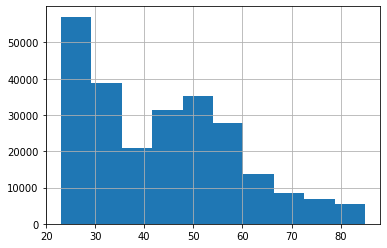

In [11]:
cr.Age.hist()

<AxesSubplot:xlabel='Age'>

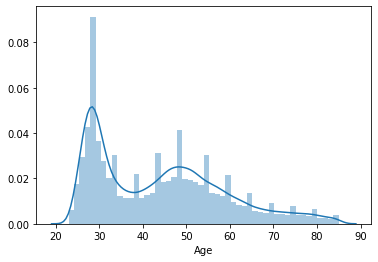

In [12]:
sns.distplot(cr.Age)

In [13]:
cr.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

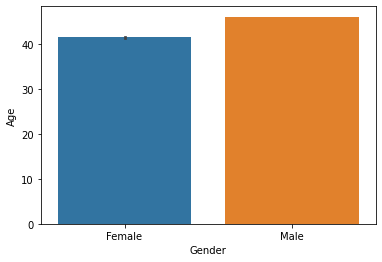

In [14]:
sns.barplot(x="Gender",y="Age",data=cr)# males are ,are to apply

<AxesSubplot:xlabel='Gender', ylabel='Age'>

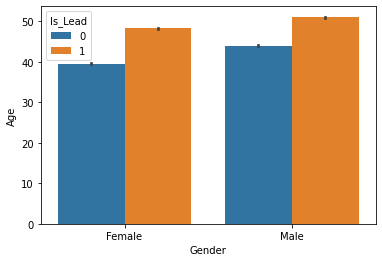

In [15]:
sns.barplot(x="Gender",y="Age",data=cr,hue="Is_Lead")# male are likely to give loan

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

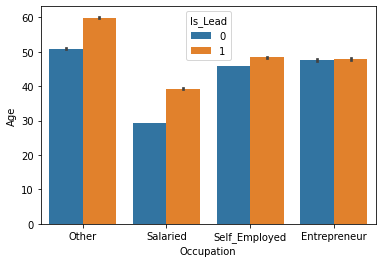

In [16]:
sns.barplot(x="Occupation",y="Age",data=cr,hue="Is_Lead")# people belonging to other occupation are given more loans as comapre to other types of occuapation

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

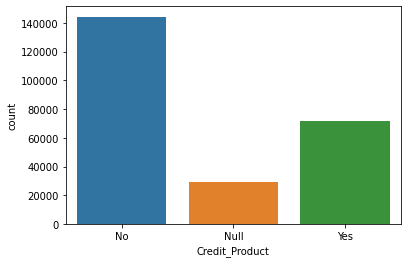

In [17]:
sns.countplot(x="Credit_Product",data=cr)

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

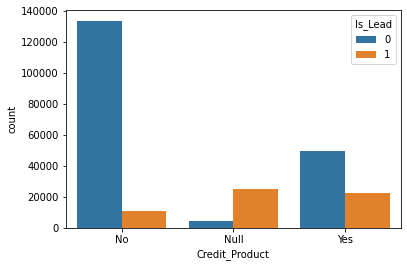

In [18]:
sns.countplot(x="Credit_Product",data=cr,hue="Is_Lead")# we see relationship between credit product and loan ganting as people we prefer loan product are given more chances to grant a loan

In [19]:
cr.shape

(245725, 11)

In [20]:
cr=cr.iloc[:,1:11]# to exclude id while building model


In [21]:
cr.head(5)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [22]:
# label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cr[cr.select_dtypes(include=["object"]).columns]=cr[cr.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [23]:
# use one hot label encoder
#cr1=pd.get_dummies(cr,columns=["Gender","Region_Code","Occupation","Channel_Code","Credit_Product","Is_Active"])

In [24]:
cr.shape

(245725, 10)

In [25]:
cr1.shape

(245725, 11)

In [26]:
cr.info()# object type means it is categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Gender               245725 non-null  int32
 1   Age                  245725 non-null  int64
 2   Region_Code          245725 non-null  int32
 3   Occupation           245725 non-null  int32
 4   Channel_Code         245725 non-null  int32
 5   Vintage              245725 non-null  int64
 6   Credit_Product       245725 non-null  int32
 7   Avg_Account_Balance  245725 non-null  int64
 8   Is_Active            245725 non-null  int32
 9   Is_Lead              245725 non-null  int64
dtypes: int32(6), int64(4)
memory usage: 13.1 MB


In [27]:
cr_x=cr.iloc[:,0:9]
cr_y=cr.iloc[:,-1]


from sklearn.model_selection import train_test_split
cr_x_train,cr_x_test,cr_y_train,cr_y_test=train_test_split(cr_x,cr_y,test_size=.2)

In [28]:
cr

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...
245720,1,51,34,3,2,109,1,1925586,0,0
245721,1,27,18,2,0,15,0,862952,1,0
245722,0,26,31,2,0,13,0,670659,0,0
245723,0,28,23,2,0,31,0,407504,0,0


# first logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(cr_x,cr_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred_y=reg.predict(cr_x)

In [32]:
from sklearn.metrics import confusion_matrix
tab_cr = confusion_matrix(pred_y , cr_y)
print(tab_cr)

[[187437  58288]
 [     0      0]]


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(cr_y,pred_y)

0.7627917387323228

In [35]:
from sklearn.metrics import roc_auc_score
log_roc_auc=roc_auc_score(cr_y,pred_y)
print(log_roc_auc)# AuROC Value(Area under AUROC )


0.5



# build decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4,class_weight="balanced",criterion="entropy") # here by default tree is build using gini coefficient
dt.fit(cr_x,cr_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [53]:
pred_y2=dt.predict(cr_x_test)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y2,cr_y_test)

array([[29539,  2467],
       [ 7939,  9200]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(cr_y_test,pred_y2)

0.7882592328822872

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(cr_y_test,pred_y2)

0.7883589788921417

In [57]:
dt.feature_importances_

array([0.        , 0.05161856, 0.        , 0.00531279, 0.00354493,
       0.07716888, 0.85775543, 0.        , 0.00459942])

In [ ]:
# from GridSearchCV
from sklearn.model_selection import GridSearchCV
search_dict={"criterion":["gini","entropy"],"max_depth":range(3,5),"min_samples_split":range(300,500)}
grid=GridSearchCV(dt,param_grid=search_dict)
grid.fit(cr_x_train,cr_y_train)

# Random forest

In [130]:
# use random forest
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=5,class_weight="balanced",max_depth=3)
rf_model.fit(cr_x_train,cr_y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
pred_y4=rf_model.predict(cr_x_test)

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y4,cr_y_test)

array([[30156,  2868],
       [ 7253,  8868]], dtype=int64)

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(cr_y_test,pred_y4)

0.7940583986163394

In [134]:
from sklearn.metrics import roc_auc_score
roc_auc_score(cr_y_test,pred_y4)

0.7808699485666677

# use Adaboost

In [58]:

from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(dt,n_estimators=10)
abc.fit(cr_x,cr_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                 

In [59]:
pred_y5=abc.predict(cr_x_test)


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y5,cr_y_test)

array([[30885,  2534],
       [ 6593,  9133]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(cr_y_test,pred_y5)

0.8142842608607183

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(cr_y_test,pred_y5)

0.803444833917433

# KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) # give odd numbers so is easy for machine to classify output.
knn.fit(cr_x_train,cr_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [141]:
pred_y6=knn.predict(cr_x_test)
print(pred_y6)

[0 0 1 ... 1 0 0]


In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(cr_y_test,pred_y6)

0.7294943534438906

In [143]:
from sklearn.metrics import roc_auc_score
roc_auc_score(cr_y_test,pred_y6)

0.5315124871164295

In [144]:
model=[reg,dt,rf_model,abc,knn]
pred_val = []
for i in model:
    pred = i.predict(cr_x_test)
    pred_val.append(pred)

In [145]:
roc_score = []
acc = []
for i in pred_val:
    score = roc_auc_score(cr_y_test,i)
    accu = accuracy_score(cr_y_test,i)
    roc_score.append(score)
    acc.append(accu)

In [146]:
pd.DataFrame({'Model Name':['Logistic' ,'Decision tree','randomforest','AdaBoost','KNN'],
             'ROC Score':roc_score,
             'Accuracy':acc})

,Model Name,ROC Score,Accuracy
0,Logistic,0.500000,0.761196
1,Decision tree,0.787713,0.787873
2,randomforest,0.780870,0.794058
3,AdaBoost,0.803933,0.818130
4,KNN,0.531512,0.729494


# Test file

In [195]:
# To deal with test file

In [64]:
test = pd.read_csv(r"F:\study\data science\hachthon\Vidya_Analytics\hackathon1\test_mSzZ8RL.csv")
test1=test

In [65]:
test.shape

(105312, 10)

In [66]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [67]:
test.Credit_Product.value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [68]:
test.Credit_Product.fillna('Null',inplace=True)

In [69]:
tes = test.drop('ID',axis = 1)

In [70]:
# label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tes[tes.select_dtypes(include=["object"]).columns]=tes[tes.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [71]:
tes

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,2,742366,0
1,1,43,18,1,1,49,1,925537,0
2,1,31,20,2,0,14,0,215949,0
3,1,29,22,1,0,33,0,868070,0
4,0,29,20,1,0,19,0,657087,0
...,...,...,...,...,...,...,...,...,...
105307,1,52,18,2,1,86,2,4242558,1
105308,1,55,27,1,1,86,2,1159153,0
105309,1,35,4,2,3,15,0,1703727,0
105310,1,53,4,1,2,93,0,737178,1


In [72]:
tes.shape

(105312, 9)

In [73]:
#test=tes.iloc[:,1:10]

In [74]:
tes.shape

(105312, 9)

In [75]:
final=abc.predict(tes)
print(final)

[0 1 0 ... 0 0 0]


In [76]:
df = pd.DataFrame({'ID':test['ID'],
                   'Is_Lead':final})

In [77]:
df.to_csv('Submission-3.csv',index=False)